In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn joblib

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [3]:
df=pd.read_csv('data.csv')
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [4]:
df.shape

(2200, 8)

In [5]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
[feature for  feature in df.columns]

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

In [7]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [8]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [9]:
# Checking for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


Text(0.5, 1.0, 'Feature Correlation Heatmap')

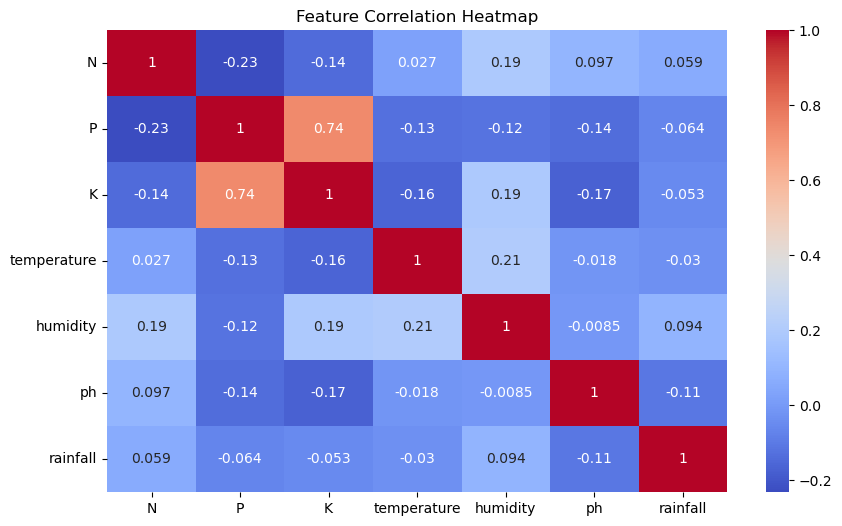

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')
plt.title("Feature Correlation Heatmap")

C:\Users\ymrud\AppData\Local\Temp\ipykernel_12208\1006263128.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)


<Axes: xlabel='N', ylabel='Count'>

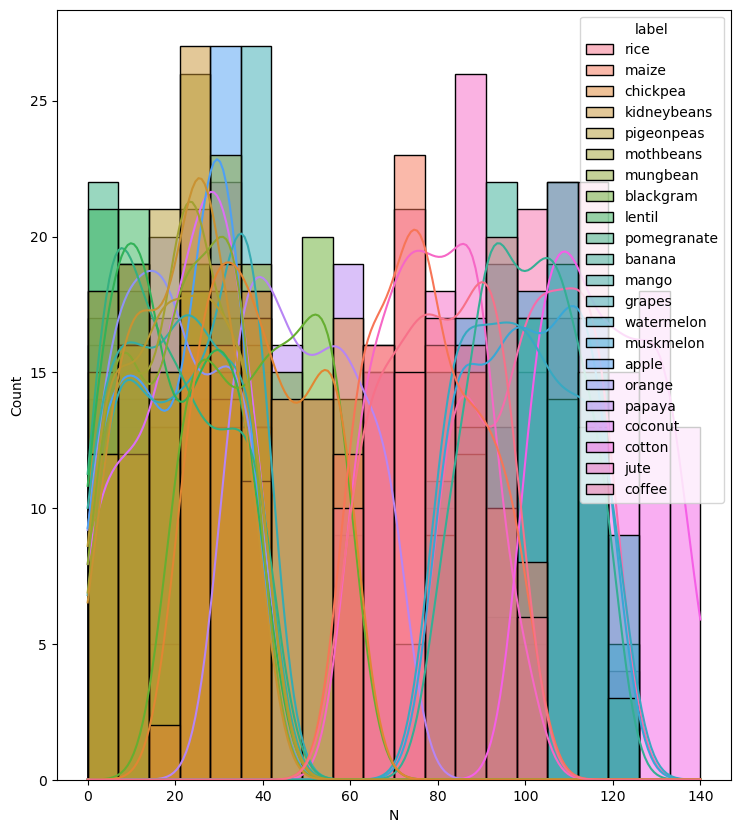

In [11]:
plt.subplots(1,1,figsize=(40,10))
plt.subplot(141)
sns.histplot(data=df,x='N',bins=20,kde=True,hue='label')

<Axes: xlabel='rainfall', ylabel='label'>

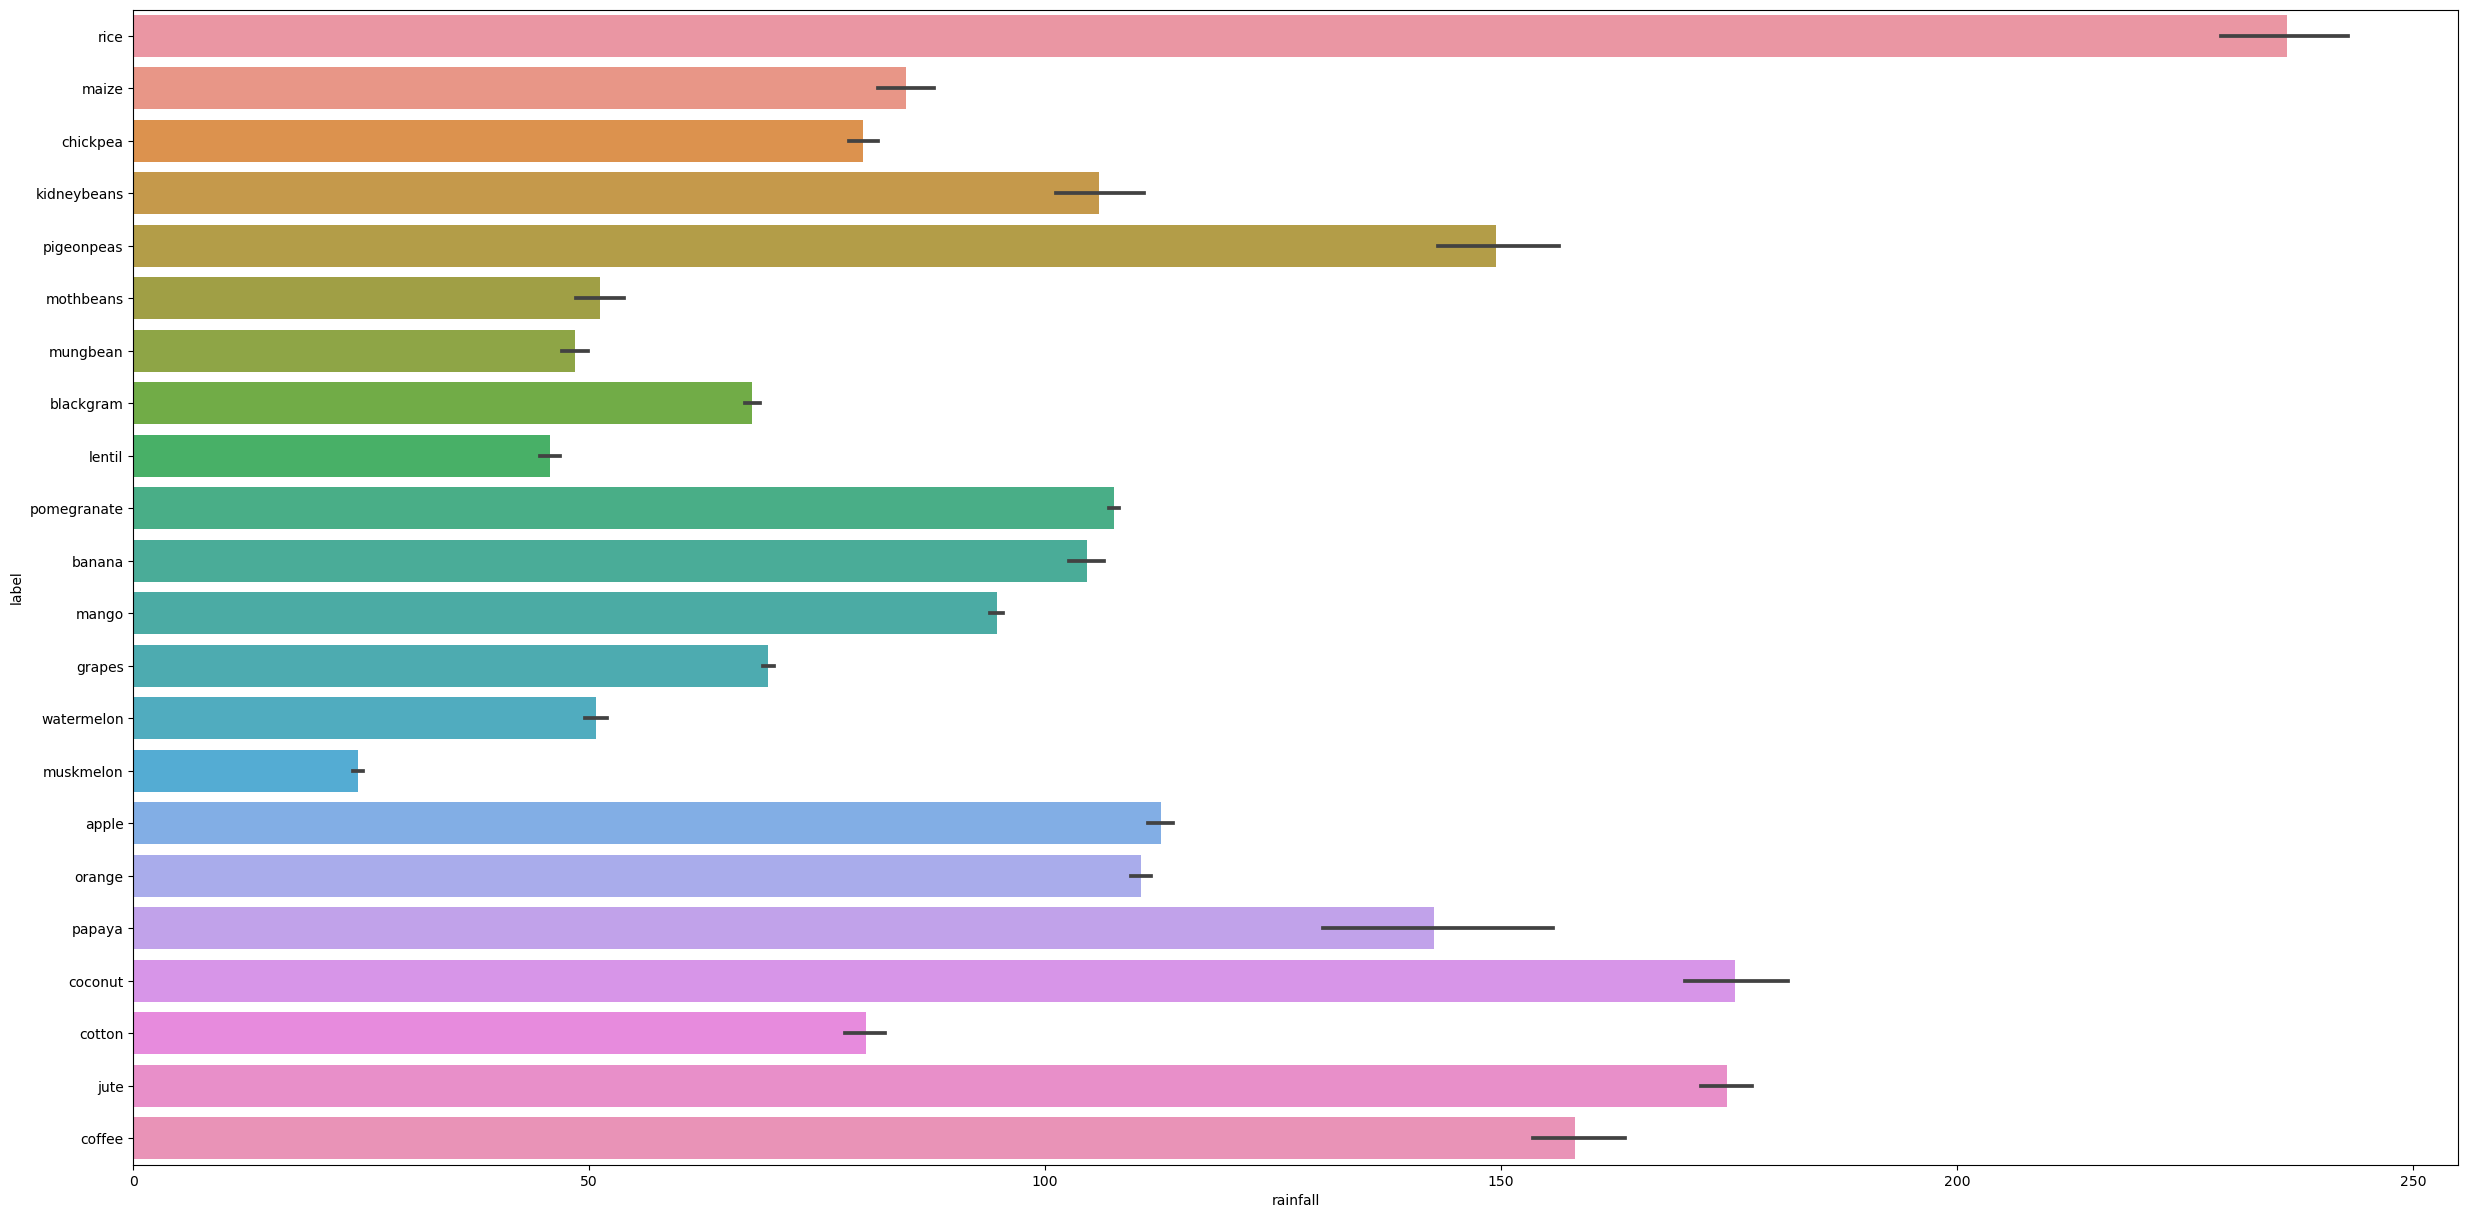

In [12]:
plt.figure(figsize = (30,15))
plt.subplot(111)
sns.barplot(data = df , x = 'rainfall' , y = 'label')

<Axes: xlabel='ph', ylabel='label'>

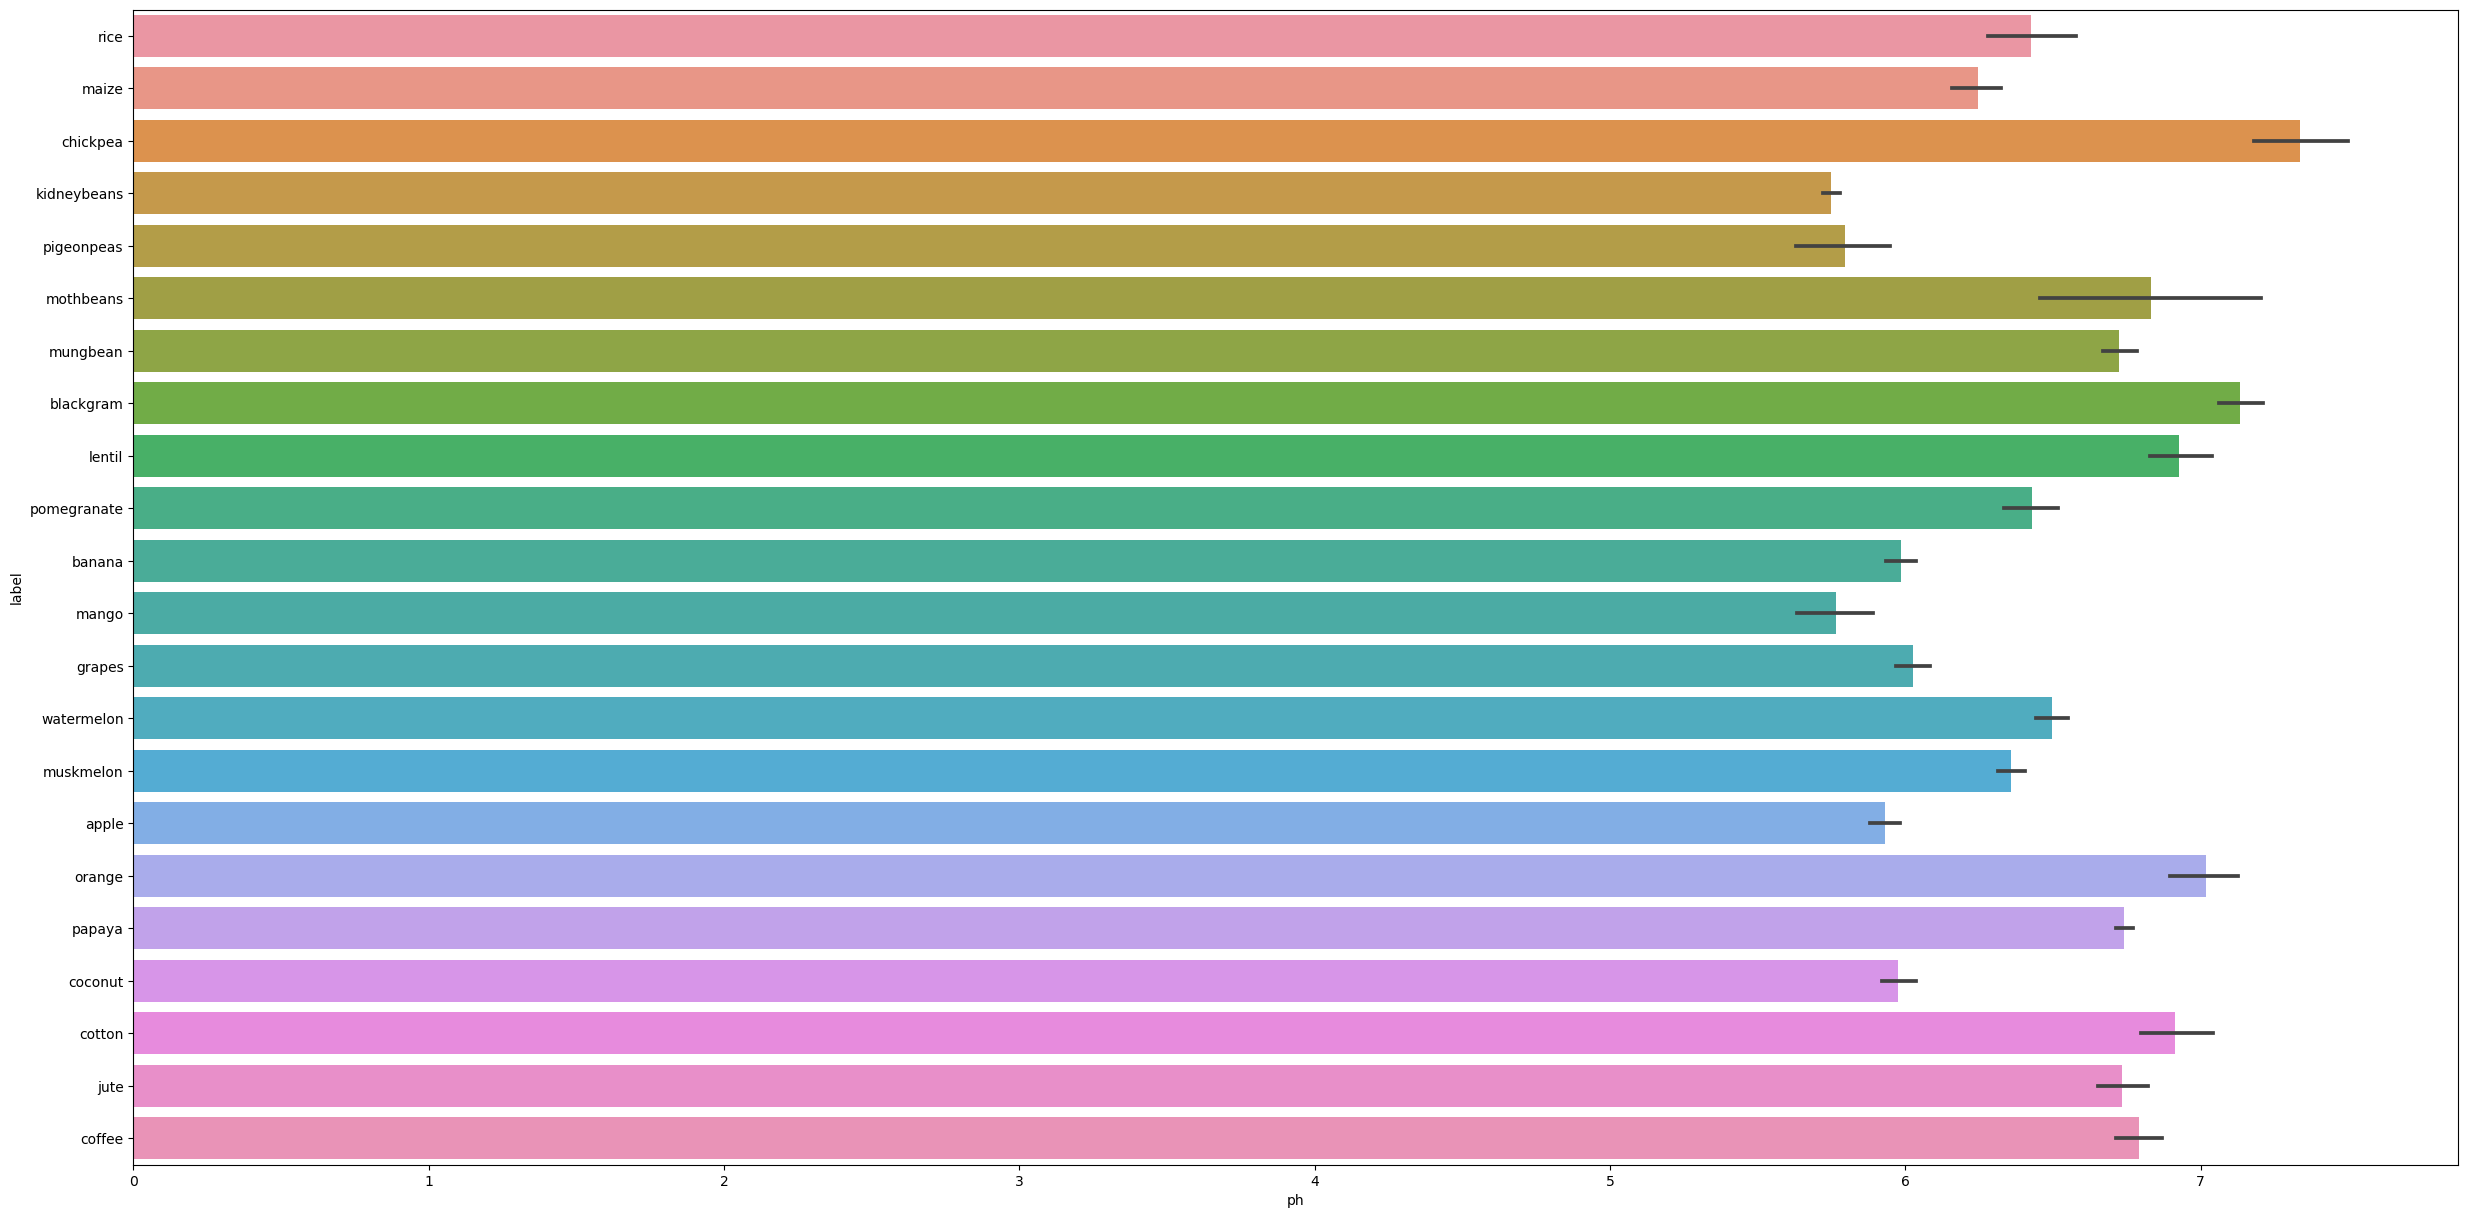

In [13]:
plt.figure(figsize = (30,15))
plt.subplot(111)
sns.barplot(data = df , x = 'ph' , y = 'label')

<Axes: xlabel='N', ylabel='label'>

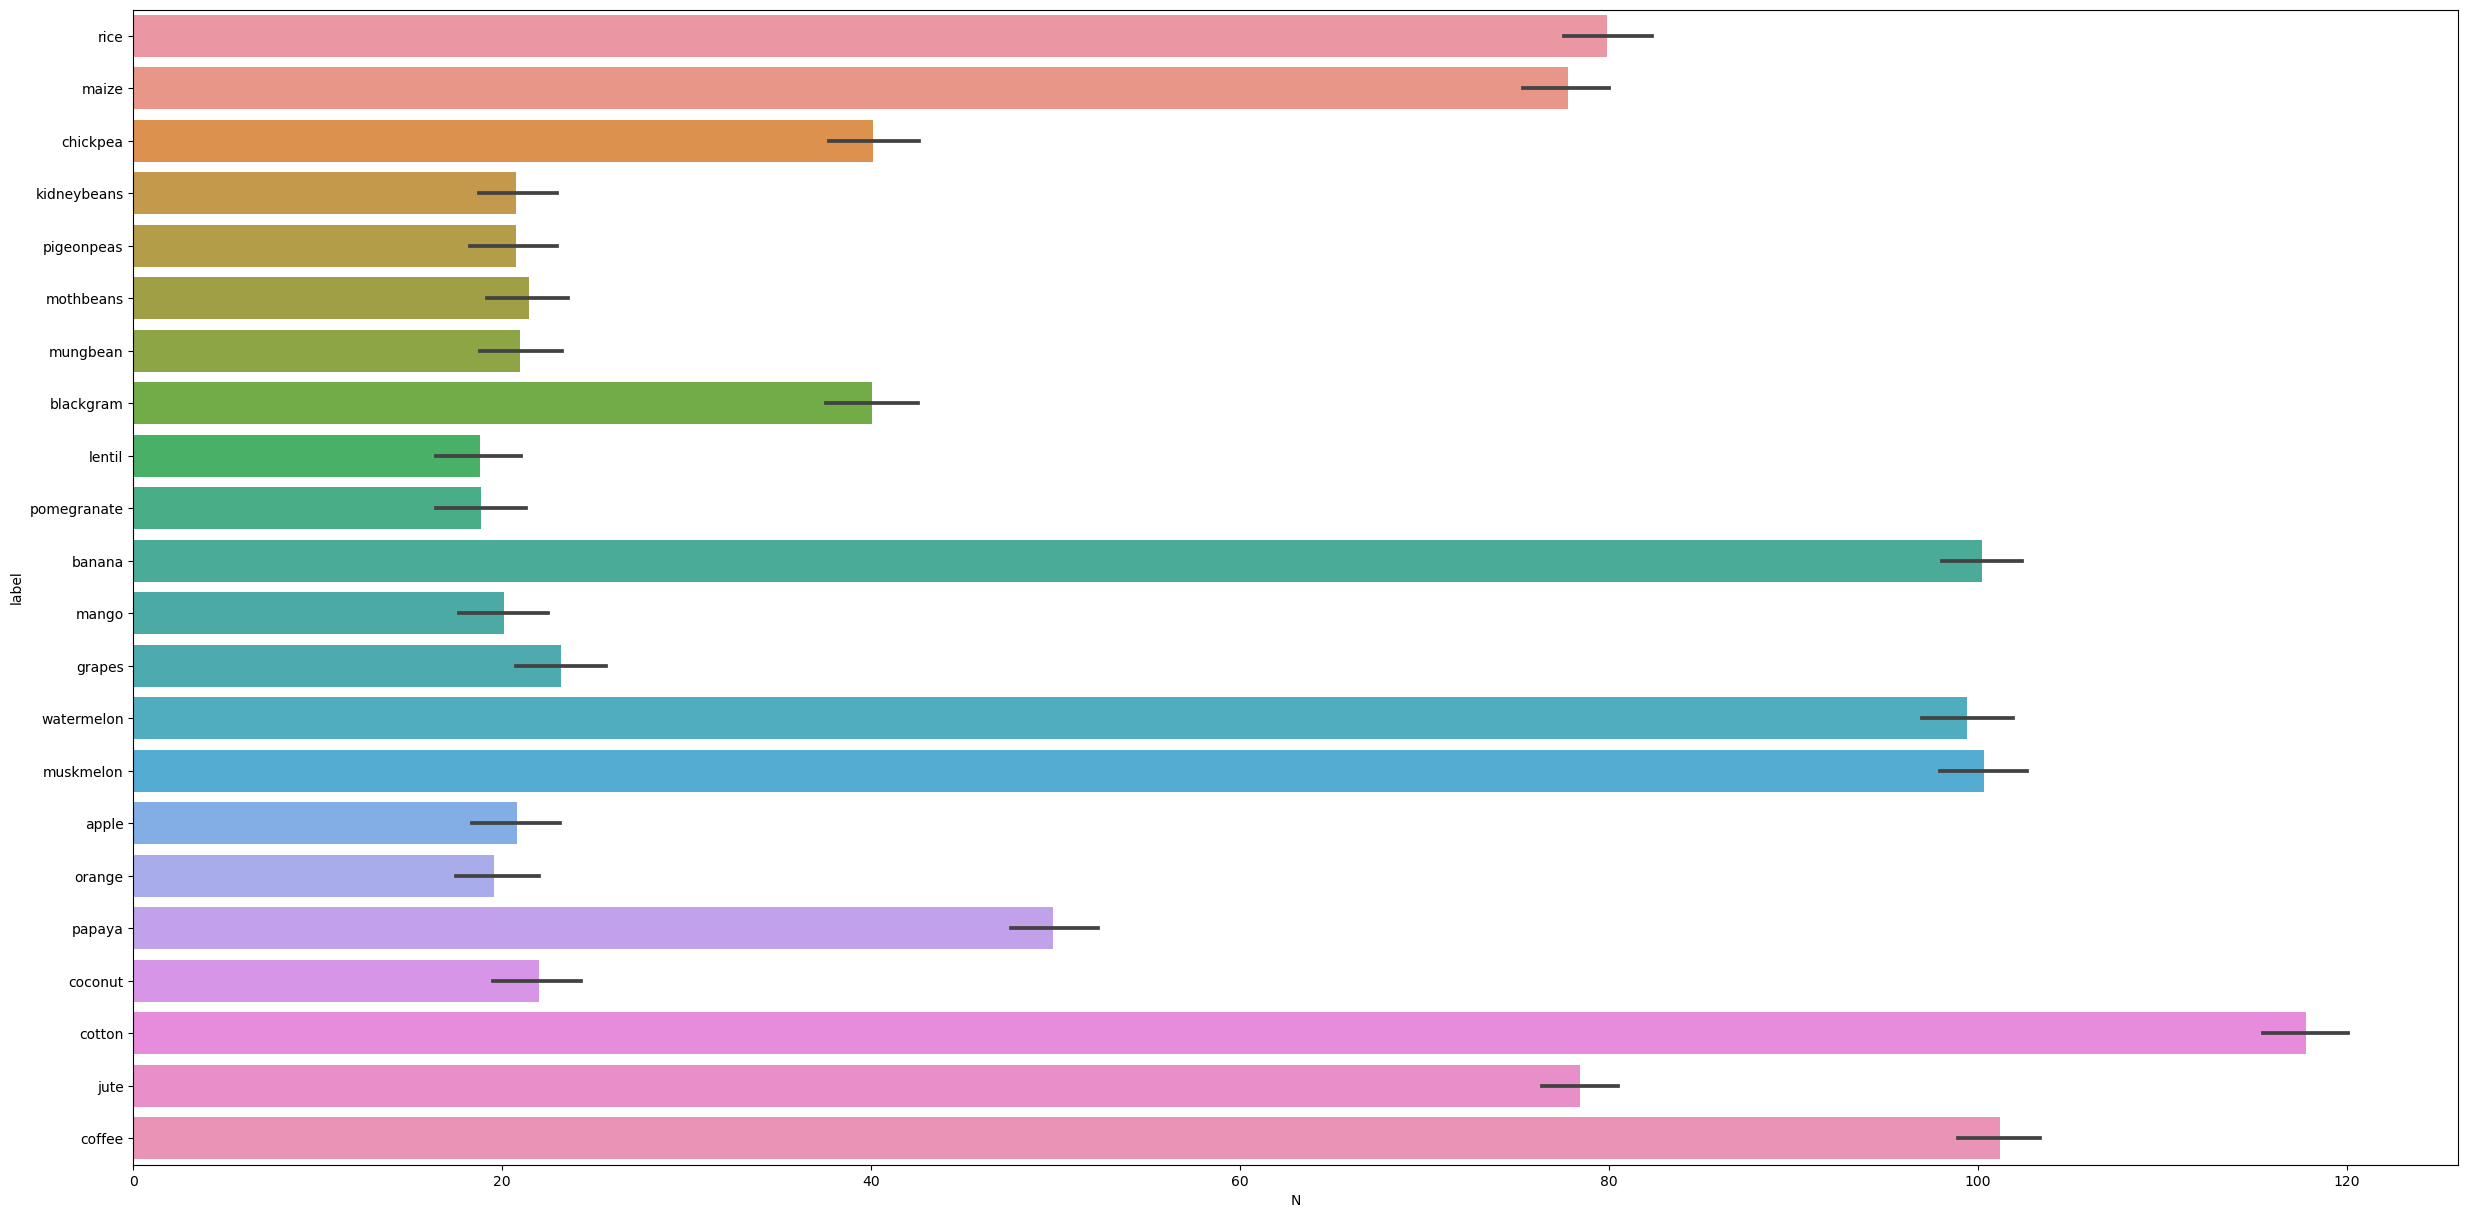

In [14]:
plt.figure(figsize = (30,15))
plt.subplot(111)
sns.barplot(data = df , x = 'N' , y = 'label')

<Axes: xlabel='K', ylabel='label'>

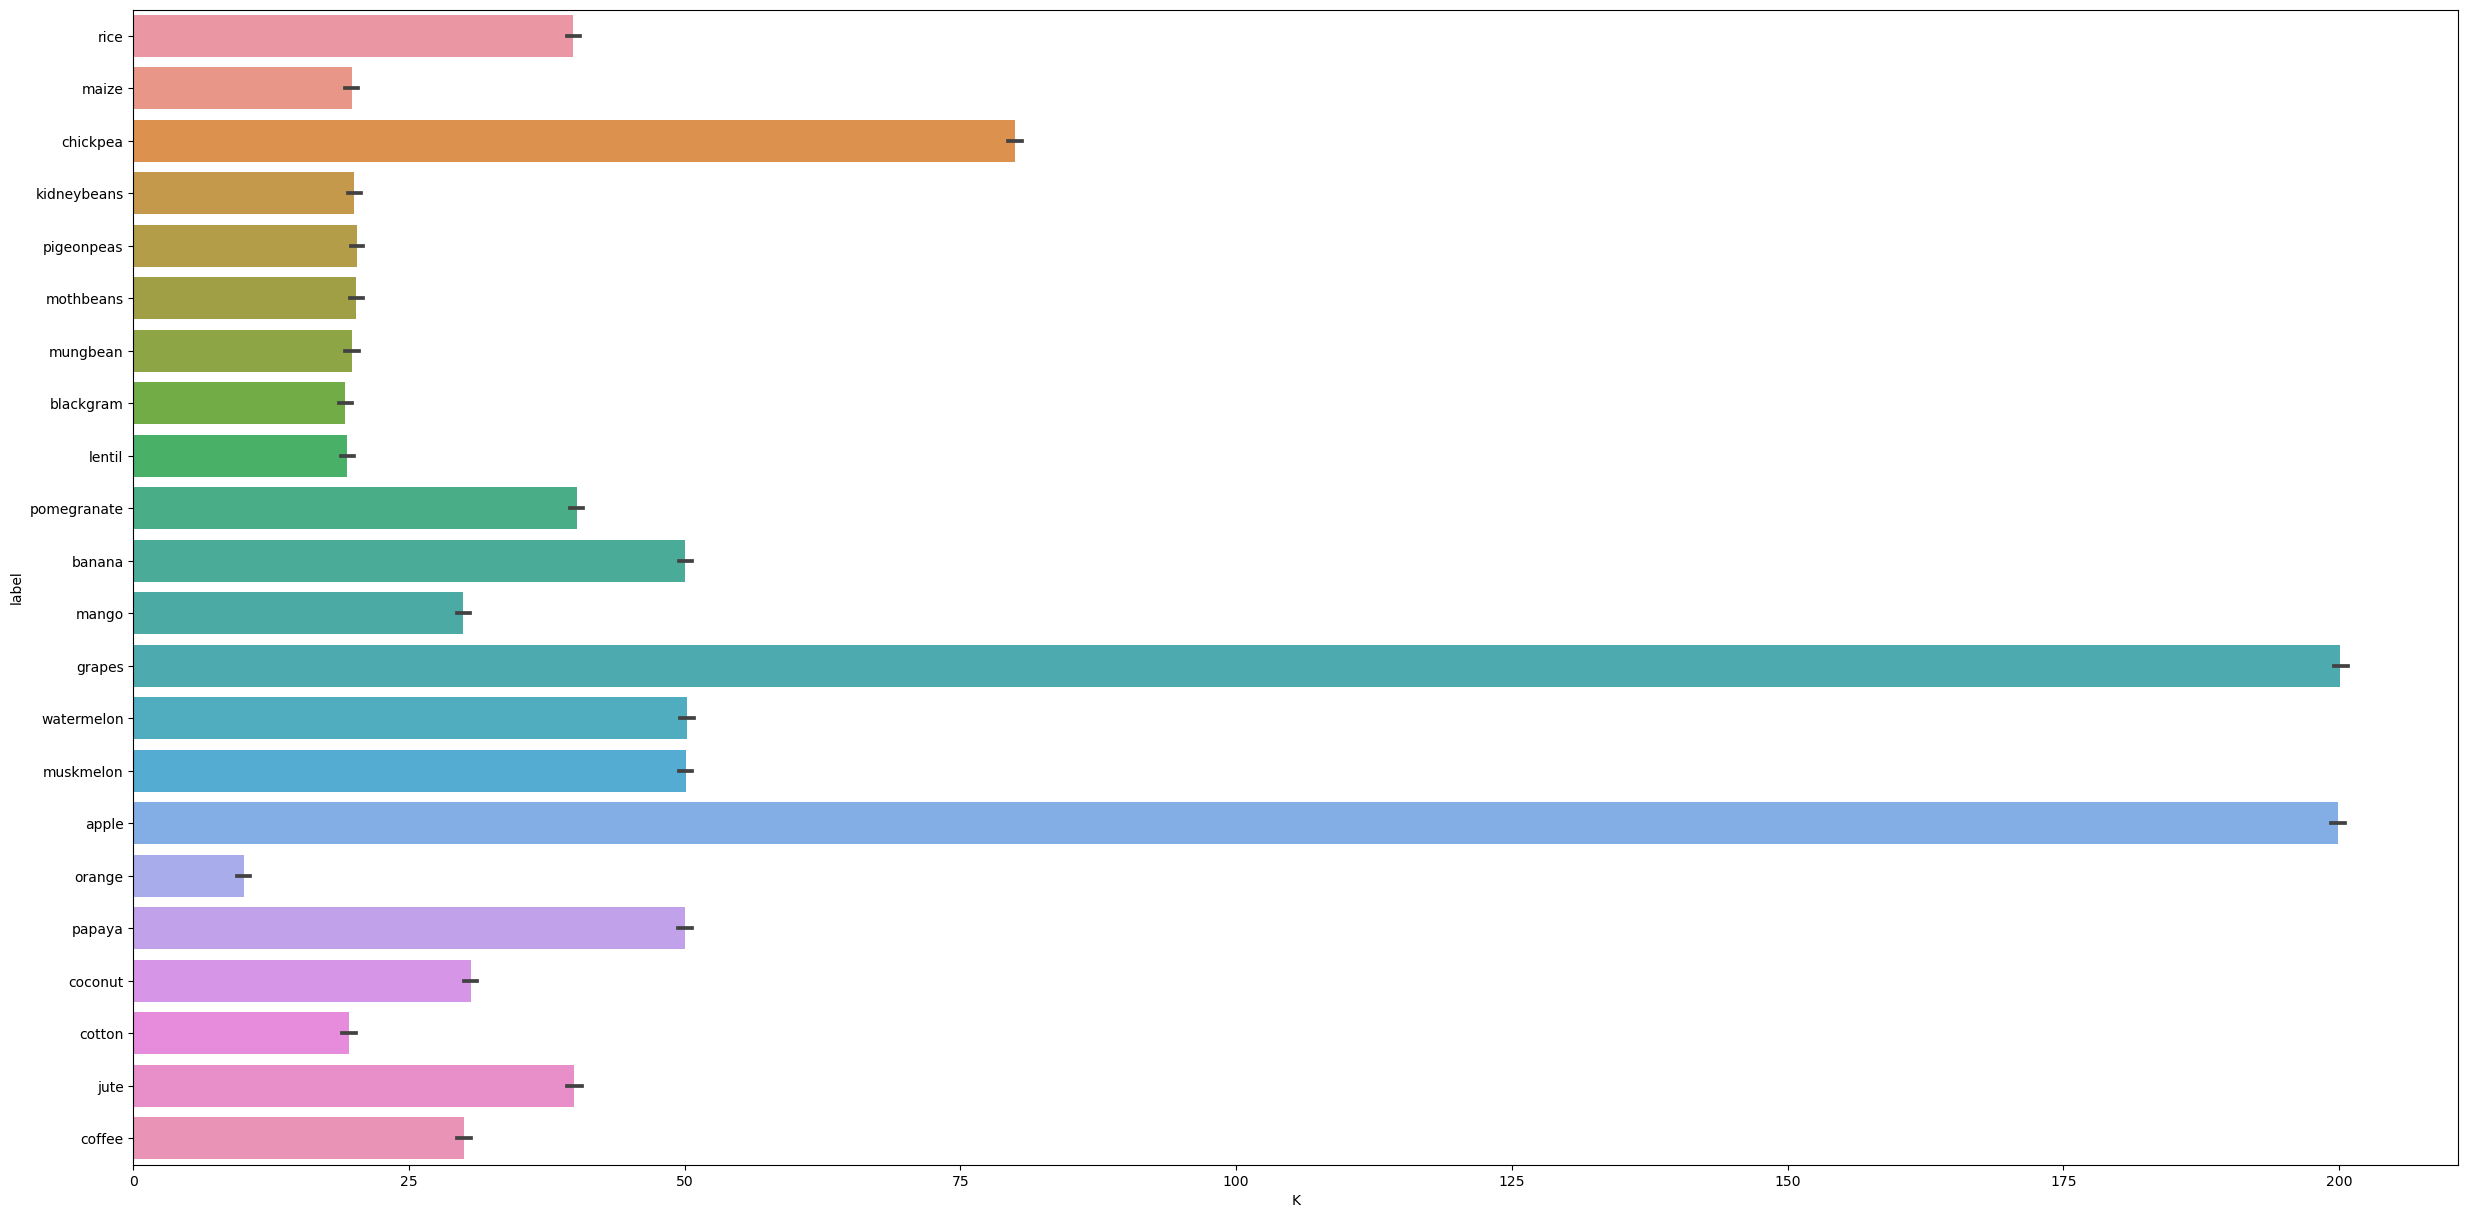

In [15]:
plt.figure(figsize = (30,15))
plt.subplot(111)
sns.barplot(data = df , x = 'K' , y = 'label')

<Axes: xlabel='rainfall', ylabel='Count'>

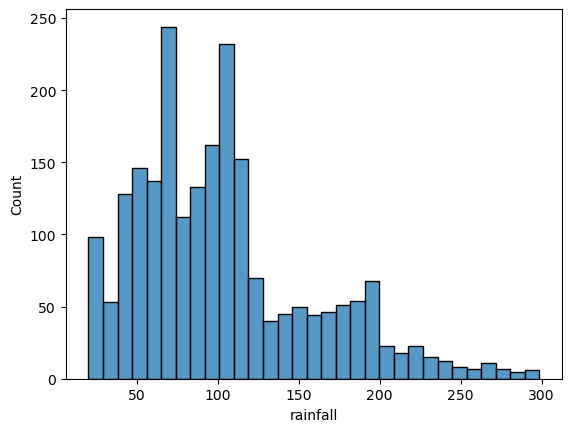

In [16]:
sns.histplot(df['rainfall'])

In [17]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [18]:
label_dict={
   'rice':1,
    'maize':2,
    'jute':3,
    'cotton':4,
    'coconut':5,
    'papaya':6,
    'orange':7,
    'apple':8,
    'muskmelon':9,
    'watermelon':10,
    'grapes':11,
    'mango':12,
    'banana':13,
    'pomegranate':14,
    'lentil':15,
    'blackgram':16,
    'mungbean':17,
    'mothbeans':18,
    'pigeonpeas':19,
    'kidneybeans':20,
    'chickpea':21,
    'coffee':22



}

df['crop']=df['label'].map(label_dict)

In [19]:
##drop categorical column
df.drop('label',axis=1,inplace=True)

In [20]:
##new dataframe
df.head(200)

,N,P,K,temperature,humidity,ph,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1
...,...,...,...,...,...,...,...,...
195,90,57,24,18.928519,72.800861,6.158860,82.341629,2
196,67,35,22,23.305468,63.246480,6.385684,108.760300,2
197,60,54,19,18.748267,62.498785,6.417820,70.234016,2
198,83,58,23,19.742133,59.662631,6.381202,65.508614,2


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [22]:
X = df.drop('crop', axis = 1)
y = df['crop']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [23]:
X_train.shape

(1760, 7)

In [24]:
X_test.shape

(440, 7)

In [25]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [26]:
X_test

,N,P,K,temperature,humidity,ph,rainfall
1451,101,17,47,29.494014,94.729813,6.185053,26.308209
1334,98,8,51,26.179346,86.522581,6.259336,49.430510
1761,59,62,49,43.360515,93.351916,6.941497,114.778071
1735,44,60,55,34.280461,90.555616,6.825371,98.540477
1576,30,137,200,22.914300,90.704756,5.603413,118.604465
...,...,...,...,...,...,...,...
59,99,55,35,21.723831,80.238990,6.501698,277.962619
71,67,45,38,22.727910,82.170688,7.300411,260.887506
1908,121,47,16,23.605640,79.295731,7.723240,72.498009
1958,116,52,19,22.942767,75.371706,6.114526,67.080226


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

In [29]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

In [30]:
algorithms = [
    LogisticRegression(),
    RandomForestClassifier(),
    GaussianNB(),
    SVC(),
    KNeighborsClassifier(),
]

# Iterate through each algorithm
for model in algorithms:
    model.fit(X_train, Y_train)  # Fit the model
    ypred = model.predict(X_test)  # Make predictions
    acc = accuracy_score(Y_test, ypred)  # Evaluate accuracy
    print(f"{model.__class__.__name__} accuracy: {acc}")


LogisticRegression accuracy: 0.9636363636363636
RandomForestClassifier accuracy: 0.9931818181818182
GaussianNB accuracy: 0.9954545454545455
SVC accuracy: 0.9681818181818181
KNeighborsClassifier accuracy: 0.9590909090909091


Apply RanfomForest Algorithm:

In [31]:
# Initialize the Random Forest Classifier
rf_classifier = GaussianNB()

# Train the model on the training data
rf_classifier.fit(X_train, Y_train)

# Make predictions on the test data
predictions = rf_classifier.predict(X_test)

In [32]:
print("\nClassification Report:\n", classification_report(Y_test, predictions))


Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.89      0.94        19
           2       1.00      1.00      1.00        21
           3       0.92      1.00      0.96        23
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        19
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        11
          16       1.00      1.00      1.00        20
          17       1.00      1.00      1.00        19
  

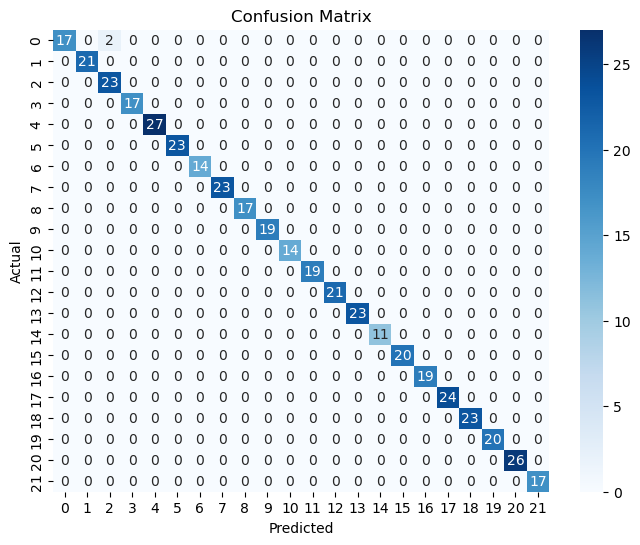

In [33]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test, predictions), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [34]:

def recommend_top_crops(input_features, model, scaler, X_columns, crop_mapping):
    input_df = pd.DataFrame([input_features], columns=X_columns)
    input_df.fillna(input_df.mean(), inplace=True)  # Handle missing values
    input_scaled = scaler.transform(input_df)
    crop_probabilities = model.predict_proba(input_scaled)
    
    top_3_indices = np.argsort(crop_probabilities[0])[-3:][::-1]
    top_3_crops = model.classes_[top_3_indices]  # These are numerical crop labels
    top_3_probs = crop_probabilities[0][top_3_indices]

    # Map numerical labels to actual crop names
    recommendations = [(crop_mapping.get(crop, f"Unknown Crop {crop}"), round(prob * 100, 2)) 
                        for crop, prob in zip(top_3_crops, top_3_probs)]
    
    return recommendations






In [37]:
test_input = {"N": 50, "P": 30, "K": 30, "temperature": 25, "humidity": 60, "ph": 6.5, "rainfall": 200}

In [38]:
crop_mapping = {1: 'rice', 2: 'maize', 3: 'jute', 4: 'cotton', 5: 'coconut', 
                6: 'papaya', 7: 'orange', 8: 'apple', 9: 'muskmelon', 10: 'watermelon', 
                11: 'grapes', 12: 'mango', 13: 'banana', 14: 'pomegranate', 
                15: 'lentil', 16: 'blackgram', 17: 'mungbean', 18: 'mothbeans', 
                19: 'pigeonpeas', 20: 'kidneybeans', 21: 'chickpea', 22: 'coffee'}

recommended_crops = recommend_top_crops(test_input, rf_classifier, scaler, X.columns, crop_mapping)
print("\nExample Output: Top 3 Recommended Crops:")
for crop, probability in recommended_crops:
    print(f"{crop}: {probability}% Confidence")



Example Output: Top 3 Recommended Crops:
coffee: 99.96% Confidence
jute: 0.04% Confidence
pigeonpeas: 0.0% Confidence


In [39]:
import joblib
joblib.dump(rf_classifier, "crop_recommendation_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']